Este documento corresponde ao Trabalho Prático para a unidade curricular Programação II no ano letivo 2024/2025

### Estudante 1 ###
Nome: Afonso Miguel Vieira Marcos
Número Mecanográfico: 202404088


In [61]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import sklearn as sk

IMPORTAR OS DADOS

In [62]:
data = pd.read_csv('student-data.csv')


 PRIMEIRA TAREFA : DATA EXPLORATION

0. Informação Geral e Tipos de Dados

Ter o ficheiro csv dos dados no mesmo diretorio de modo a estes estarem acessiveis.
Informações do dataset(atravez do comando data.info()): numero,nome e tipo(int,object,etc...) das features; dimensões e espaço usado do dataframe. 

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

1. Valores que aparecem nas features 
 Útil para perceber a cardinalidade  das features.

In [64]:
print("\n--- Número e tipos de Valores  por Coluna ---")
for col in data.columns:
        num_unique = data[col].nunique()
        unique_values = data[col].unique()
        try:
            # para melhor legibilidade
            sorted_unique_values = np.sort(unique_values)
            # Formata os valores como string separados por vírgula
            values_str = ', '.join(map(str, sorted_unique_values))
        except TypeError: # Se não der para ordenar (tipos mistos)
            values_str = ', '.join(map(str, unique_values))
        print(f"{col}: {num_unique} ({values_str})")


--- Número e tipos de Valores  por Coluna ---
school: 2 (GP, MS)
sex: 2 (F, M)
age: 8 (15, 16, 17, 18, 19, 20, 21, 22)
address: 2 (R, U)
famsize: 2 (GT3, LE3)
Pstatus: 2 (A, T)
Medu: 5 (0, 1, 2, 3, 4)
Fedu: 5 (0, 1, 2, 3, 4)
Mjob: 5 (at_home, health, other, services, teacher)
Fjob: 5 (at_home, health, other, services, teacher)
reason: 4 (course, home, other, reputation)
guardian: 3 (father, mother, other)
traveltime: 4 (1, 2, 3, 4)
studytime: 4 (1, 2, 3, 4)
failures: 4 (0, 1, 2, 3)
schoolsup: 2 (no, yes)
famsup: 2 (no, yes)
paid: 2 (no, yes)
activities: 2 (no, yes)
nursery: 2 (no, yes)
higher: 2 (no, yes)
internet: 2 (no, yes)
romantic: 2 (no, yes)
famrel: 5 (1, 2, 3, 4, 5)
freetime: 5 (1, 2, 3, 4, 5)
goout: 5 (1, 2, 3, 4, 5)
Dalc: 5 (1, 2, 3, 4, 5)
Walc: 5 (1, 2, 3, 4, 5)
health: 5 (1, 2, 3, 4, 5)
absences: 34 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 38, 40, 54, 56, 75)
passed: 2 (no, yes)


2. Primeira visualização dos dados
    Contacto com as dez primeiras e ultimas 5 linhas do dataframe com objetivo de perceber como os dados estão organizados e estruturados.

In [65]:
print("--- Primeiras 10 linhas dos dados ---")
print(data.head(10))
print("\n--- Últimas 5 linhas dos dados ---")
print(data.tail(5))

--- Primeiras 10 linhas dos dados ---
  school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

   ... internet romantic  famrel  freetime  goout Dalc Walc health absences  \
0  ...       no       no       4   

3. Contagem Explícita de Valores Ausentes
Cálculo e exibição do número exato de valores ausentes (NaN/nulos) em cada coluna

In [66]:
print("\n--- Contagem de Valores Ausentes por Coluna ---")
missing_values = data.isnull().sum()
print(missing_values)
print(f"\n--- Total de Valores Ausentes no Dataset: {missing_values.sum()} ---")
# Se houver muitos valores ausentes (>0), investigar mais a fundo depois.


--- Contagem de Valores Ausentes por Coluna ---
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

--- Total de Valores Ausentes no Dataset: 0 ---


4. Estatísticas Descritivas (Variáveis Numéricas)
eração de estatísticas descritivas (média, desvio padrão, mínimo, máximo, quartis) para todas as colunas numéricas (inteiros e floats) 

In [67]:

# Para colunas numéricas (int, float)
print("\n--- Estatísticas Descritivas (Colunas Numéricas)  ---")
print(data.describe())


--- Estatísticas Descritivas (Colunas Numéricas)  ---
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013

5. Estatísticas Descritivas (Variáveis Categóricas)
eração de estatísticas descritivas para colunas do tipo 'object' (geralmente strings/categóricas) usando `data.describe(include='object')

In [68]:
print("\n--- Estatísticas Descritivas (Colunas Categóricas/Object) ---")
# O include='object' retorna strings. 
print(data.describe(include='object'))


--- Estatísticas Descritivas (Colunas Categóricas/Object) ---
       school  sex address famsize Pstatus   Mjob   Fjob  reason guardian  \
count     395  395     395     395     395    395    395     395      395   
unique      2    2       2       2       2      5      5       4        3   
top        GP    F       U     GT3       T  other  other  course   mother   
freq      349  208     307     281     354    141    217     145      273   

       schoolsup famsup paid activities nursery higher internet romantic  \
count        395    395  395        395     395    395      395      395   
unique         2      2    2          2       2      2        2        2   
top           no    yes   no        yes     yes    yes      yes       no   
freq         344    242  214        201     314    375      329      263   

       passed  
count     395  
unique      2  
top       yes  
freq      265  


 7. Análise Inicial da Variável Alvo( 'passed' )

In [69]:

print("\n--- Distribuição da Variável Alvo ('passed') ---")
print(data['passed'].value_counts())
print("\n--- Distribuição Percentual da Variável Alvo ('passed') ---")
print(data['passed'].value_counts(normalize=True) * 100)


--- Distribuição da Variável Alvo ('passed') ---
passed
yes    265
no     130
Name: count, dtype: int64

--- Distribuição Percentual da Variável Alvo ('passed') ---
passed
yes    67.088608
no     32.911392
Name: proportion, dtype: float64


8. Box plot para as faltas 'absences'

/tmp/ipykernel_114558/717363307.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['absences'], palette='viridis')


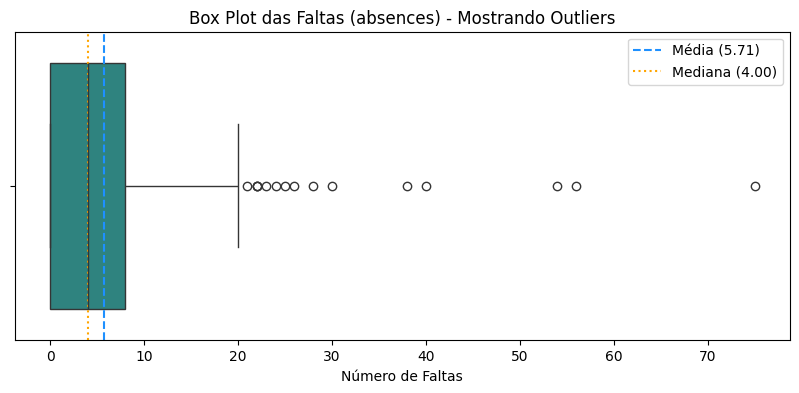


--- Potenciais Outliers Identificados (Total: 15) ---
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
276     GP   F   18       R     GT3       A     3     2     other  services   
183     GP   F   17       U     LE3       T     3     3     other     other   
74      GP   F   16       U     GT3       T     3     3     other  services   
315     GP   F   19       R     GT3       T     2     3     other     other   
307     GP   M   19       U     GT3       T     4     4   teacher  services   
280     GP   M   17       U     LE3       A     4     1  services     other   
205     GP   F   17       U     GT3       T     3     4   at_home  services   
103     GP   F   15       U     GT3       T     3     2  services     other   
40      GP   F   16       U     LE3       T     2     2     other     other   
198     GP   F   17       U     GT3       T     4     4  services   teacher   
320     GP   F   17       U     GT3       A     4     3  services  services 

In [95]:
plt.figure(figsize=(10, 4)) # Ajustar tamanho conforme necessário, horizontal pode ser bom

# Criar o Box Plot para 'absences'
# Usar x= para um box plot horizontal, que pode ser melhor para visualizar
# outliers numa escala ampla como a de faltas.
sns.boxplot(x=data['absences'], palette='viridis')

plt.title('Box Plot das Faltas (absences) - Mostrando Outliers')
plt.xlabel('Número de Faltas')
#plt.ylabel('') # Não necessário para boxplot horizontal de uma variável

# Adicionar linhas de Média e Mediana para referência (opcional no boxplot)
mean_absences = data['absences'].mean()
median_absences = data['absences'].median()
plt.axvline(mean_absences, color='dodgerblue', linestyle='--', label=f'Média ({mean_absences:.2f})')
plt.axvline(median_absences, color='orange', linestyle=':', label=f'Mediana ({median_absences:.2f})')
plt.legend()


plt.show()

# Opcional: Imprimir os valores considerados outliers pelo critério do boxplot (aproximado)
q1 = data['absences'].quantile(0.25)
q3 = data['absences'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr



outliers = data[(data['absences'] < lower_bound) | (data['absences'] > upper_bound)]
print(f"\n--- Potenciais Outliers Identificados (Total: {len(outliers)}) ---")
# Mostrar alguns exemplos de outliers (ordenados)
print(outliers.sort_values('absences', ascending=False).head(15)) # Mostra os 15 maiores

9. Line plot para comparar faltas 'absences' e tempo livre 'freetime'. 


Com base no gráfico apresentado, é possível tirar duas conclusões iniciais sobre a relação entre o tempo livre dos alunos (freetime) e o número de faltas (absences):
1ªconclusao:
Menos tempo livre pode estar associado a mais faltas: Alunos com nível mais baixo de tempo livre (nível 1) apresentam, em média, um número significativamente maior de faltas do que os demais. Isso pode indicar que uma carga elevada de compromissos fora da escola (como trabalho ou responsabilidades familiares interfere na frequência escolar
2ªconclusão:
A relação não é linear e estabiliza com mais tempo livre: A partir do nível 3 de tempo livre, o número médio de faltas tende a se estabilizar, com uma leve elevação nos níveis 4 e 5. Isso pode sugerir que, embora mais tempo livre reduza inicialmente as faltas, um excesso também pode estar relacionado a menor comprometimento escolar em alguns casos.


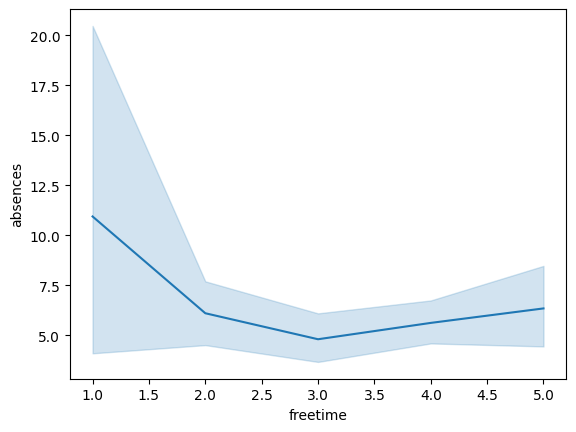

In [105]:
sns.lineplot(x='freetime', y='absences', data=data, estimator=np.mean)
print('Com base no gráfico apresentado, é possível tirar duas conclusões iniciais sobre a relação entre o tempo livre dos alunos (freetime) e o número de faltas (absences):')

print("1ªconclusao:\nMenos tempo livre pode estar associado a mais faltas: Alunos com nível mais baixo de tempo livre (nível 1) apresentam, em média, um número significativamente maior de faltas do que os demais. Isso pode indicar que uma carga elevada de compromissos fora da escola (como trabalho ou responsabilidades familiares interfere na frequência escolar")
      
print('2ªconclusão:\nA relação não é linear e estabiliza com mais tempo livre: A partir do nível 3 de tempo livre, o número médio de faltas tende a se estabilizar, com uma leve elevação nos níveis 4 e 5. Isso pode sugerir que, embora mais tempo livre reduza inicialmente as faltas, um excesso também pode estar relacionado a menor comprometimento escolar em alguns casos.')


10. Grafico de relação entre faltas e admissões

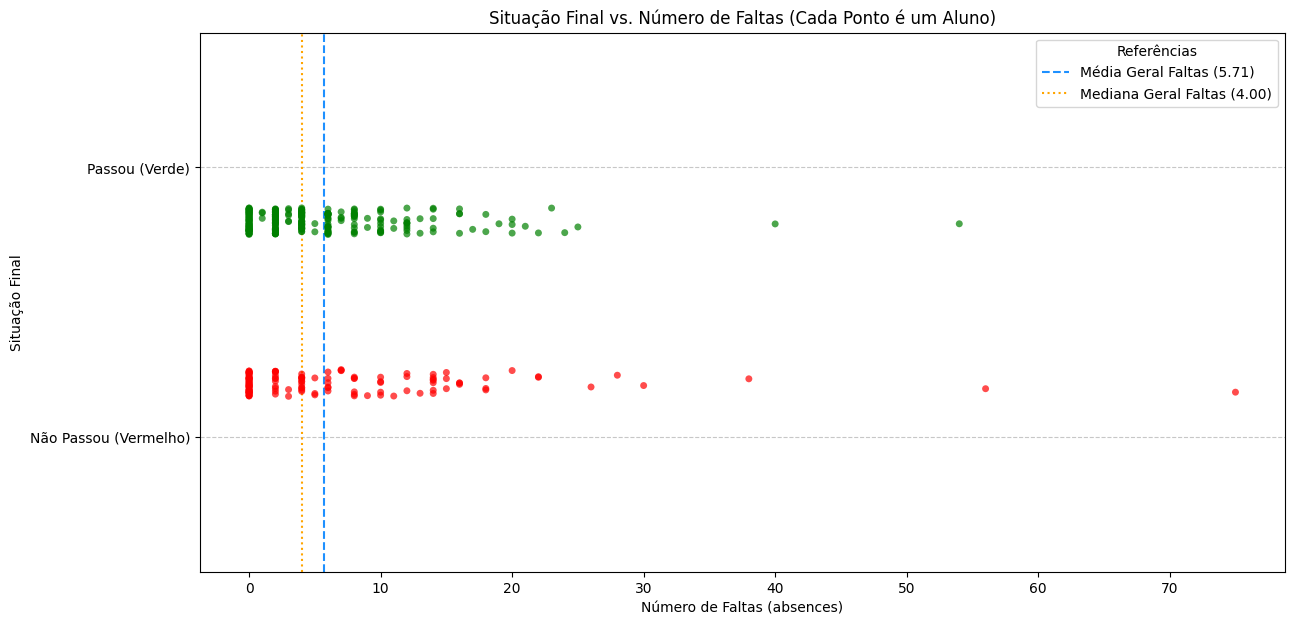


--- Média e Mediana de Faltas por Grupo ---
            mean  median
passed                  
no      6.761538     4.0
yes     5.192453     4.0

    Conclusão sobre a Relação entre Situação Final e Número de Faltas:

    Observa-se uma correlação entre o número de faltas e a situação final do aluno.

    1.  **Alunos Aprovados (Verde):** A grande maioria dos alunos que passaram ("Passou")
        apresenta um número baixo de faltas, concentrando-se principalmente abaixo de 10-15 faltas.
        Muitos estão abaixo da mediana geral de faltas (4.00) e da média geral (5.71).
        Embora existam alguns casos de aprovação com um número maior de faltas (um perto de 30,
        outro perto de 40 e um acima de 50), são exceções.

    2.  **Alunos Reprovados (Vermelho):** Os alunos que não passaram ("Não Passou") exibem
        uma maior dispersão no número de faltas. É importante notar que:
        *   Alguns alunos reprovaram mesmo com poucas faltas (inclusive 0 faltas),
            suger

In [106]:



# Define o mapeamento de cores
color_map = {'yes': 'green', 'no': 'red'}

plt.figure(figsize=(14, 7)) # Um pouco mais largo para espalhar os pontos

# Usar stripplot para visualizar pontos individuais
# Jitter=True adiciona uma pequena dispersão horizontal para evitar sobreposição perfeita
sns.stripplot(
    x='absences',
    y='passed',        
    data=data,
    hue='passed',       #detalhes visuais para melhorar a visulaização
    dodge=True,         
    palette=color_map, 
    order=['yes', 'no'],
    jitter=0.1,        
    alpha=0.7,         
    size=5             
)

# Adicionar linhas de Média e Mediana Geral de Faltas como referência
mean_absences = data['absences'].mean()
median_absences = data['absences'].median()
plt.axvline(mean_absences, color='dodgerblue', linestyle='--', label=f'Média Geral Faltas ({mean_absences:.2f})')
plt.axvline(median_absences, color='orange', linestyle=':', label=f'Mediana Geral Faltas ({median_absences:.2f})')

# Ajustes do gráfico
plt.title('Situação Final vs. Número de Faltas (Cada Ponto é um Aluno)')
plt.xlabel('Número de Faltas (absences)')
plt.ylabel('Situação Final')
plt.yticks([0, 1], ['Passou (Verde)', 'Não Passou (Vermelho)']) # Melhora rótulos do eixo Y

# Adicionar grid horizontal para separar melhor as categorias
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar a legenda
# O stripplot pode criar uma legenda por padrão, mas podemos querer apenas as linhas verticais
handles, labels = plt.gca().get_legend_handles_labels()
# Filtra para manter apenas as legendas das linhas verticais (axvline)
line_labels = {label: handle for handle, label in zip(handles, labels) if 'Média' in label or 'Mediana' in label}
plt.legend(line_labels.values(), line_labels.keys(), title="Referências")


plt.show()

# Opcional: Ver média/mediana de faltas por grupo
print("\n--- Média e Mediana de Faltas por Grupo ---")
print(data.groupby('passed')['absences'].agg(['mean', 'median']))
def imprimir_conclusao_grafico():
    conclusao = """
    Conclusão sobre a Relação entre Situação Final e Número de Faltas:

    Observa-se uma correlação entre o número de faltas e a situação final do aluno.

    1.  **Alunos Aprovados (Verde):** A grande maioria dos alunos que passaram ("Passou")
        apresenta um número baixo de faltas, concentrando-se principalmente abaixo de 10-15 faltas.
        Muitos estão abaixo da mediana geral de faltas (4.00) e da média geral (5.71).
        Embora existam alguns casos de aprovação com um número maior de faltas (um perto de 30,
        outro perto de 40 e um acima de 50), são exceções.

    2.  **Alunos Reprovados (Vermelho):** Os alunos que não passaram ("Não Passou") exibem
        uma maior dispersão no número de faltas. É importante notar que:
        *   Alguns alunos reprovaram mesmo com poucas faltas (inclusive 0 faltas),
            sugerindo que outros fatores (como desempenho em avaliações, não mostrados
            neste gráfico) foram determinantes para a reprovação.
        *   No entanto, há uma clara tendência de que um número elevado de faltas está
            fortemente associado à reprovação. No gráfico, todos os alunos com mais de
            aproximadamente 25-30 faltas não passaram. À medida que o número de faltas
            aumenta, a probabilidade de reprovação parece aumentar consideravelmente.

    3.  **Implicação Geral:** Embora um baixo número de faltas não garanta a aprovação
        (pois outros fatores influenciam), um número elevado de faltas parece ser um
        forte preditor de reprovação. Manter a frequência às aulas é, portanto, um fator
        crucial que contribui para aumentar as chances de sucesso acadêmico. A média (5.71)
        e a mediana (4.00) de faltas gerais servem como referências, mas a distinção entre
        aprovados e reprovados se torna mais nítida à medida que o número de faltas aumenta
        significativamente além desses valores.
    """
    print(conclusao)

# Para executar e ver a conclusão:
if __name__ == "__main__":
    imprimir_conclusao_grafico()